#Import necessary libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Load the terrorism dataset

In [31]:
data = pd.read_csv('terrorism_data11.csv')

<ipython-input-31-782ba3e8fbec>:1: DtypeWarning:

Columns (5,32,34,77,95,97,122) have mixed types. Specify dtype option on import or set low_memory=False.



# Data preprocessing tasks

In [32]:

# Check the shape of the dataset
print('Shape of dataset:', data.shape)

print(data.info())

# Check the data types of the columns
print('Data types:', data.dtypes)

# Check for missing values
print('Missing values:', data.isnull().sum())

# Check for duplicates
print('Duplicate rows:', data.duplicated().sum())

# Check summary statistics
print('Summary statistics:', data.describe())


Shape of dataset: (10001, 136)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 136 entries, s.no to related
dtypes: float64(59), int64(23), object(54)
memory usage: 10.4+ MB
None
Data types: s.no         int64
eventid      int64
iyear        int64
imonth       int64
iday         int64
             ...  
INT_LOG      int64
INT_IDEO     int64
INT_MISC     int64
INT_ANY      int64
related     object
Length: 136, dtype: object
Missing values: s.no           0
eventid        0
iyear          0
imonth         0
iday           0
            ... 
INT_LOG        0
INT_IDEO       0
INT_MISC       0
INT_ANY        0
related     9379
Length: 136, dtype: int64
Duplicate rows: 0
Summary statistics:                s.no       eventid         iyear        imonth          iday  \
count  10001.000000  1.000100e+04  10001.000000  10001.000000  10001.000000   
mean    5000.000000  1.976154e+11   1976.088791      6.376062     15.147085   
std     2887.184355  2.931635e+0

#Data Visualization

['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'South Vietnam' 'Brunei' 'Zaire'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Myanmar' 'Afghanistan'
 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Malaysia'
 'Singapore' 'Botswana' 'Jamaica' 'Chad' 'North Yemen' 'Andorra' 'Syria'
 'South Korea' 'United Arab Emirates' 'South Africa' 'Kenya' 'Iraq'
 'Somalia' 'Tanzania' 'Sri Lanka' 'Namibia' '

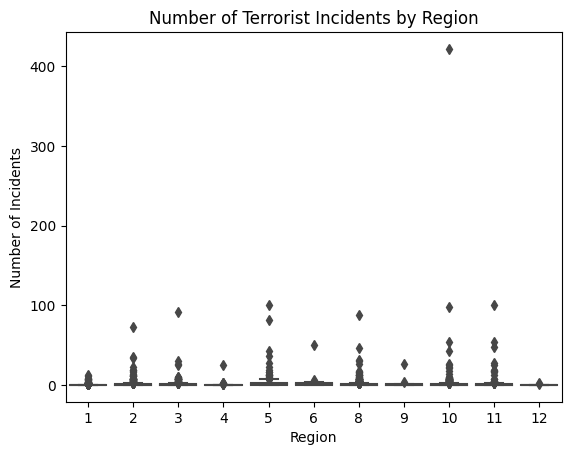

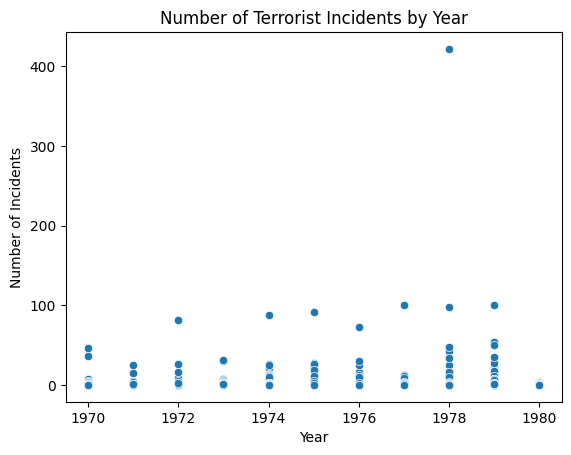

In [33]:

# Create box plot of number of terrorist incidents by region
print(data['country_txt'].unique())
sns.boxplot(x='region', y='nkill', data=data)
plt.title('Number of Terrorist Incidents by Region')
plt.xlabel('Region')
plt.ylabel('Number of Incidents')
plt.show()

# Create scatterplot of number of terrorist incidents by year
sns.scatterplot(x=data.iloc[:10000,2], y='nkill', data=data)
plt.title('Number of Terrorist Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()


#Creating a new feature 'total attacks'

In [34]:
# Create new feature representing total number of attacks in a country

data['total_attacks'] = data.groupby(['country'])['country'].transform('count')
print(data.total_attacks)


0          13
1         114
2         126
3         143
4          75
         ... 
9996     1480
9997       28
9998      198
9999     1654
10000     126
Name: total_attacks, Length: 10001, dtype: int64


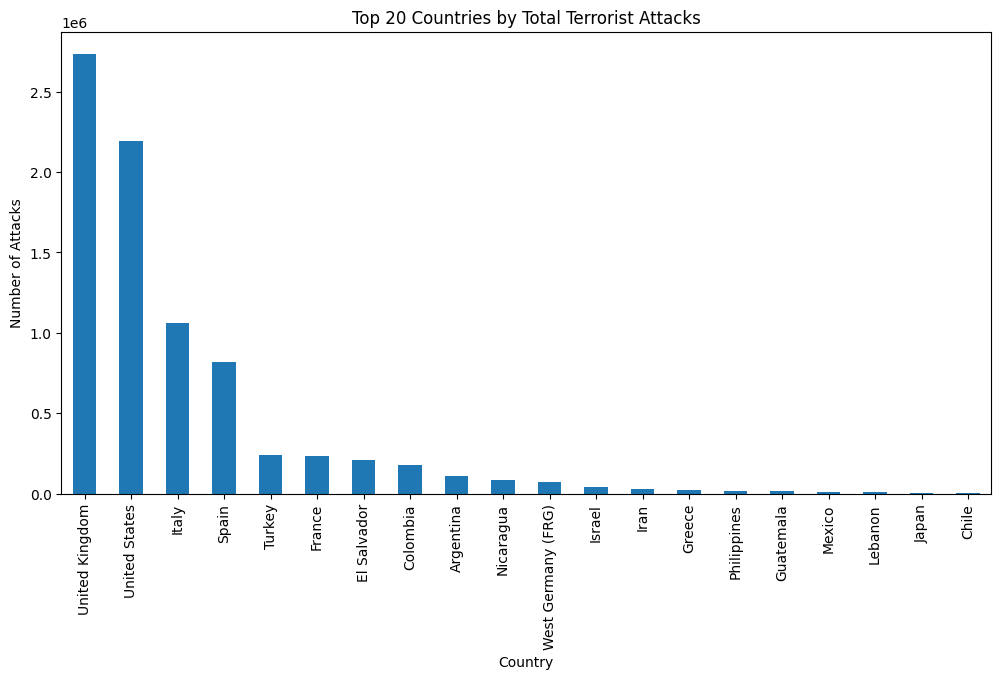

In [35]:
# Create bar chart of total attacks by country
fig, ax = plt.subplots(figsize=(12,6))
data.groupby(['country_txt'])['total_attacks'].sum().sort_values(ascending=False)[:20].plot(kind='bar', ax=ax)

ax.set_title('Top 20 Countries by Total Terrorist Attacks')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Attacks')
plt.show()


In [36]:
# Create choropleth map of number of terrorist incidents by country

fig = px.choropleth(data, locations='country_txt', locationmode='country names', color='nkill',
                    hover_name='country_txt', range_color=[0, 500],
                    title='Number of Terrorist Incidents by Country')
fig.update_layout(
    width=800,
    height=500
)
fig.show()

#Creating a new attribute 'hotzone'

In [37]:
#Identify hot zones of terrorism
hot_zones = data.groupby(['region'])['nkill'].sum().sort_values(ascending=False) # Group the data by region and sum the nkill values to get the total number of deaths by region
print('Hot zones of terrorism:', hot_zones)

# Create a bubble chart of the hot zones
fig = px.scatter(hot_zones, x=hot_zones.index, y=hot_zones.values, size=hot_zones.values,
                 color=hot_zones.index, hover_name=hot_zones.index,
                 title='Hot Zones of Terrorism')
fig.update_layout(xaxis_title='Region', yaxis_title='Total Number of Deaths')
fig.update_layout(
    width=800,
    height=500
)
fig.show()

Hot zones of terrorism: region
8     2663.0
10    1326.0
2      868.0
5      702.0
3      650.0
11     511.0
1      270.0
6      111.0
4       37.0
9       33.0
12       3.0
Name: nkill, dtype: float64


In [38]:
print(data['country_txt'].unique())

['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'South Vietnam' 'Brunei' 'Zaire'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Myanmar' 'Afghanistan'
 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Malaysia'
 'Singapore' 'Botswana' 'Jamaica' 'Chad' 'North Yemen' 'Andorra' 'Syria'
 'South Korea' 'United Arab Emirates' 'South Africa' 'Kenya' 'Iraq'
 'Somalia' 'Tanzania' 'Sri Lanka' 'Namibia' '